# 8. Plots and Descriptive Analysis

## 8.1 Import the Libs

In [55]:
import pandas as pd
import requests
import lxml
from bs4 import BeautifulSoup
import time
import pyodbc
import numpy as np
from urllib.error import URLError, HTTPError
from urllib.request import Request, urlopen
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt

## 8.2 Reading data From Database

In [2]:
# Function Select
def SQLSelect(query):
    conn = pyodbc.connect('Trusted_Connection=yes',
                      driver = '{ODBC Driver 17 for SQL Server}',
                      server = 'localhost',
                      database = 'MLS_Project')
    out = pd.read_sql_query(query,conn)
    return out

query_all_rank = '''
    Select 
    * 
    from TableRankBase
'''
query_all_details = '''
    Select 
    * 
    from TableDetailsBase
'''
query_max_rank = '''
    SELECT
        maior = max(Proposicao)
    from TableDetailsBase
'''
query_max_details = '''
    SELECT
        maior = max(Proposicao)
    from TableDetailsBase
'''


In [79]:
df_rank = SQLSelect(query_all_rank)
df_rank_details = SQLSelect(query_all_details)

In [80]:
df_rank.head()

,Generalkey,RK,TEAM_NAME,MP,W,D,L,GF,GA,GD,PTS,PTS_MP,XG,XGA,XGD,XGD_90,NOTES,CONFERENCE,SEASON
0,1,1,Philadelphia,23,14,5,4,44,20,24,47,2.04,35.0,23.5,11.4,0.57,? First Round,EastConf,2020
1,2,2,Toronto FC,23,13,5,5,33,26,7,44,1.91,31.1,22.5,8.6,0.43,? First Round,EastConf,2020
2,3,3,Columbus Crew,23,12,5,6,36,21,15,41,1.78,28.6,28.1,0.5,0.03,? First Round,EastConf,2020
3,4,4,Orlando City,23,11,8,4,40,25,15,41,1.78,27.5,24.3,3.2,0.16,? First Round,EastConf,2020
4,5,5,NYCFC,23,12,3,8,37,25,12,39,1.70,33.3,26.7,6.7,0.33,? First Round,EastConf,2020


In [81]:
df_rank_details.head()

,Generalkey,TEAM_NAME,GAME_Date,GAME_Time,Comp,SEASON_Round,WEEK_DAY,TEAM_Venue,GAME_Result,GF,...,Opponent,XG,XGA,POSS,ATTENDANCE,Captain,Formation,Referee,Notes,SEASON
0,1,Sporting-KC,2020-02-29,19:30:00,MLS,Regular Season,Sat,Away,W,3,...,Vancouver,0.5,2.2,52,22120.0,Matt Besler,4-3-3,Ted Unkel,,2020
1,2,Sporting-KC,2020-03-07,19:30:00,MLS,Regular Season,Sat,Home,W,4,...,Houston Dynamo,2.6,0.7,56,21188.0,Matt Besler,4-3-3,Allen Chapman,,2020
2,3,Sporting-KC,2020-08-21,18:30:00,MLS,Regular Season,Fri,Away,W,2,...,Minnesota Utd,0.9,0.9,42,0.0,Alan Pulido,4-3-3,Ramy Touchan,,2020
3,4,Sporting-KC,2020-08-25,19:30:00,MLS,Regular Season,Tue,Home,L,2,...,Houston Dynamo,2.2,2.6,49,0.0,Alan Pulido,4-1-4-1,Joe Dickerson,,2020
4,5,Sporting-KC,2020-08-29,19:00:00,MLS,Regular Season,Sat,Away,D,1,...,Colorado Rapids,0.6,1.2,38,0.0,Alan Pulido,4-1-4-1,Armando Villarreal,,2020


## 8.3 Standarizing the Team Names

In [82]:
# Mapping for Team_Names
TEAM_NAME_dict = {'Atlanta Utd':'Atlanta-United','Austin':'Austin-FC','CF Montréal':'CF-Montreal',
                  'Charlotte':'Charlotte-FC','Chicago Fire':'Chicago-Fire','Colorado Rapids':'Colorado-Rapids',
                  'Columbus Crew':'Columbus-Crew','D.C. United':'DC-United','FC Cincinnati':'FC-Cincinnati',
                  'FC Dallas':'FC-Dallas','Houston Dynamo':'Houston-Dynamo','Inter Miami':'Inter-Miami',
                  'LA Galaxy':'LA-Galaxy','Los Angeles FC':'Los-Angeles-FC','Minnesota Utd':'Minnesota-United',
                  'Montreal Impact':'Montreal-Impact','Nashville':'Nashville-SC','New England':'New-England-Revolution',
                  'NY Red Bulls':'New-York-City-FC','NYCFC':'New-York-Red-Bulls','Orlando City':'Orlando-City',
                  'Philadelphia':'Philadelphia-Union','Portland Timbers':'Portland-Timbers','Real Salt Lake':'Real-Salt-Lake',
                  'San Jose':'San-Jose-Earthquakes','Seattle':'Seattle-Sounders-FC','Sporting KC':'Sporting-KC',
                  'Toronto FC':'Toronto-FC','Vancouver':'Vancouver-Whitecaps-FC'}
df_rank['TEAM_NAME'] = df_rank['TEAM_NAME'].map(TEAM_NAME_dict)

In [83]:
df_rank[['TEAM_NAME']]

,TEAM_NAME
0,Philadelphia-Union
1,Toronto-FC
2,Columbus-Crew
3,Orlando-City
4,New-York-Red-Bulls
...,...
185,Vancouver-Whitecaps-FC
186,Houston-Dynamo
187,Minnesota-United
188,Colorado-Rapids


## 8.4 General Description Data

In [84]:
df_rank.describe()

,Generalkey,RK,MP,W,D,L,GF,GA,GD,PTS,PTS_MP,XG,XGA,XGD,XGD_90,SEASON
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,95.500000,6.531579,32.421053,12.236842,7.947368,12.236842,47.452632,47.452632,0.000000,44.657895,1.378263,31.282105,31.281579,0.000526,0.000474,2018.773684
std,54.992424,3.586653,3.996239,3.677719,2.881682,4.014749,10.839150,11.410353,14.544949,11.184542,0.305238,23.939355,23.825388,9.671840,0.306974,2.285529
min,1.000000,1.000000,18.000000,4.000000,0.000000,4.000000,12.000000,20.000000,-44.000000,16.000000,0.590000,0.000000,0.000000,-28.600000,-0.840000,2015.000000
25%,48.250000,3.250000,34.000000,10.000000,6.000000,10.000000,41.250000,40.000000,-9.000000,37.250000,1.172500,0.000000,0.000000,-4.125000,-0.127500,2017.000000
50%,95.500000,6.000000,34.000000,12.000000,8.000000,12.000000,48.000000,47.500000,1.000000,46.000000,1.410000,39.650000,38.650000,0.000000,0.000000,2019.000000
75%,142.750000,9.000000,34.000000,14.750000,9.750000,15.000000,54.000000,55.000000,9.000000,51.750000,1.560000,50.800000,51.950000,2.900000,0.097500,2021.000000
max,190.000000,14.000000,34.000000,22.000000,18.000000,22.000000,85.000000,75.000000,48.000000,73.000000,2.150000,80.000000,65.300000,40.700000,1.200000,2022.000000


In [85]:
df_rank_details.describe()

,Generalkey,GF,GA,XG,XGA,POSS,ATTENDANCE,SEASON
count,6090.000000,6090.000000,6090.000000,6090.000000,6090.000000,6090.000000,6090.000000,6090.000000
mean,3045.500000,1.464204,1.464204,0.975911,0.975911,44.414614,18753.846305,2018.699179
std,1758.175901,1.232178,1.232178,0.959109,0.959109,17.801658,10659.668555,2.327190
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,1523.250000,1.000000,1.000000,0.000000,0.000000,41.000000,14566.000000,2017.000000
50%,3045.500000,1.000000,1.000000,0.900000,0.900000,49.000000,18589.000000,2019.000000
75%,4567.750000,2.000000,2.000000,1.600000,1.600000,55.000000,22120.000000,2021.000000
max,6090.000000,7.000000,7.000000,5.700000,5.700000,83.000000,74479.000000,2022.000000


In [86]:
df_rank_TeamYearGames = df_rank.groupby(['TEAM_NAME','SEASON'])['MP'].sum().unstack(level = 1)
df_rank_TeamYearGames.fillna(0)

SEASON,2015,2016,2017,2018,2019,2020,2021,2022
TEAM_NAME,,,,,,,,
Atlanta-United,0.0,0.0,34.0,34.0,34.0,23.0,34.0,34.0
Austin-FC,0.0,0.0,0.0,0.0,0.0,0.0,34.0,34.0
CF-Montreal,0.0,0.0,0.0,0.0,0.0,0.0,34.0,34.0
Charlotte-FC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
Chicago-Fire,34.0,34.0,34.0,34.0,34.0,23.0,34.0,34.0
Colorado-Rapids,34.0,34.0,34.0,34.0,34.0,18.0,34.0,34.0
Columbus-Crew,34.0,34.0,34.0,34.0,34.0,23.0,34.0,34.0
DC-United,34.0,34.0,34.0,34.0,34.0,23.0,34.0,34.0
FC-Cincinnati,0.0,0.0,0.0,0.0,34.0,23.0,34.0,34.0


In [87]:
df_rank_details_TeamYearGames = df_rank_details.groupby(['TEAM_NAME','SEASON'])['Comp'].count().unstack(level = 1)
df_rank_details_TeamYearGames.fillna(0)

SEASON,2015,2016,2017,2018,2019,2020,2021,2022
TEAM_NAME,,,,,,,,
Atlanta-United,0.0,0.0,34.0,34.0,34.0,20.0,34.0,34.0
Austin-FC,0.0,0.0,0.0,0.0,0.0,0.0,34.0,34.0
CF-Montreal,0.0,0.0,0.0,0.0,0.0,0.0,34.0,34.0
Charlotte-FC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
Chicago-Fire,34.0,34.0,34.0,34.0,34.0,20.0,34.0,34.0
Colorado-Rapids,34.0,34.0,34.0,34.0,34.0,15.0,34.0,34.0
Columbus-Crew,34.0,34.0,34.0,34.0,34.0,20.0,34.0,34.0
DC-United,34.0,34.0,34.0,34.0,34.0,20.0,34.0,34.0
FC-Cincinnati,0.0,0.0,0.0,0.0,34.0,20.0,34.0,34.0


In [88]:
df_rank_TeamYearRank = df_rank.groupby(['TEAM_NAME','SEASON'])['RK'].sum().unstack(level = 1)
df_rank_TeamYearRank.fillna(0)

SEASON,2015,2016,2017,2018,2019,2020,2021,2022
TEAM_NAME,,,,,,,,
Atlanta-United,0.0,0.0,4.0,2.0,2.0,12.0,5.0,11.0
Austin-FC,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0
CF-Montreal,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0
Charlotte-FC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
Chicago-Fire,10.0,10.0,3.0,10.0,8.0,11.0,12.0,12.0
Colorado-Rapids,10.0,2.0,10.0,11.0,9.0,8.0,1.0,10.0
Columbus-Crew,2.0,9.0,5.0,5.0,10.0,3.0,9.0,8.0
DC-United,4.0,4.0,11.0,4.0,5.0,13.0,8.0,14.0
FC-Cincinnati,0.0,0.0,0.0,0.0,12.0,14.0,14.0,5.0


In [89]:
df_rank_TeamYears = pd.DataFrame(df_rank.groupby('SEASON')['TEAM_NAME'].count())
df_rank_TeamYears

,TEAM_NAME
SEASON,
2015,20
2016,20
2017,22
2018,23
2019,24
2020,26
2021,27
2022,28


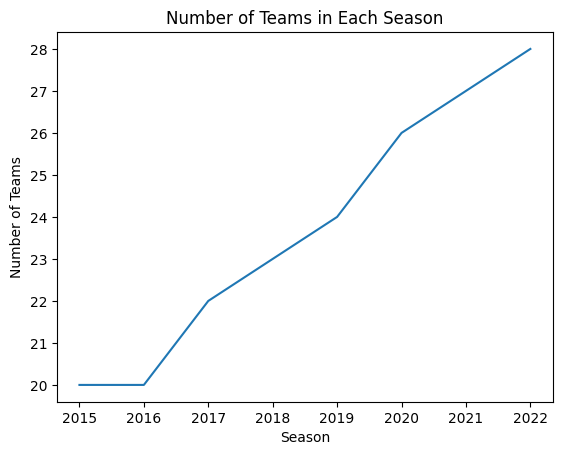

In [90]:
df_rank_TeamYears.plot()
plt.title("Number of Teams in Each Season")
plt.ylabel("Number of Teams")
plt.xlabel("Season")
plt.legend().remove()
plt.show()

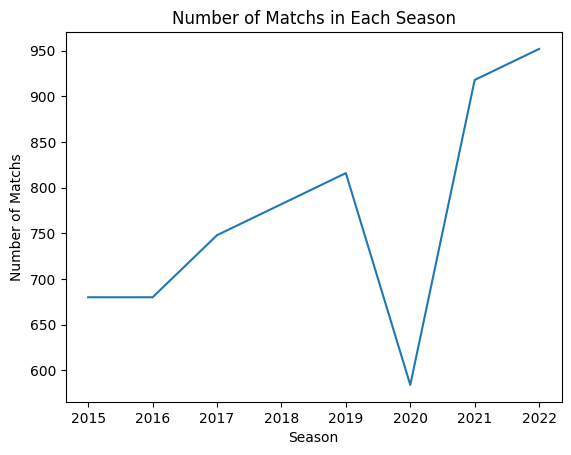

In [92]:
df_rank_TeamYears_MP.plot()
plt.title("Number of Matchs in Each Season")
plt.ylabel("Number of Matchs")
plt.xlabel("Season")
plt.legend().remove()
plt.show()

# 9. Data Cleaning, Feature Creating and Removing duplicates

### At this step will be created a UNIQUE list of games with the variable Result = ["H", "A","D"]

In [42]:
## 9.1 Looking for standarize the names on Rank Details

In [94]:
pd.unique(df_rank_details['Opponent'])

array(['Vancouver', 'Houston Dynamo', 'Minnesota Utd', 'Colorado Rapids',
       'FC Dallas', 'Orlando City', 'Chicago Fire', 'Nashville',
       'FC Cincinnati', 'Real Salt Lake', 'Columbus Crew',
       'Portland Timbers', 'Los Angeles FC', 'San Jose', 'LA Galaxy',
       'Seattle', 'Sporting KC', 'Philadelphia', 'Montreal Impact',
       'Atlanta Utd', 'Inter Miami', 'Toronto FC', 'D.C. United',
       'NY Red Bulls', 'New England', 'NYCFC', 'Austin', 'CF Montréal',
       'Charlotte'], dtype=object)

In [95]:
df_rank_details['Opponent'].unique().tolist()

['Vancouver',
 'Houston Dynamo',
 'Minnesota Utd',
 'Colorado Rapids',
 'FC Dallas',
 'Orlando City',
 'Chicago Fire',
 'Nashville',
 'FC Cincinnati',
 'Real Salt Lake',
 'Columbus Crew',
 'Portland Timbers',
 'Los Angeles FC',
 'San Jose',
 'LA Galaxy',
 'Seattle',
 'Sporting KC',
 'Philadelphia',
 'Montreal Impact',
 'Atlanta Utd',
 'Inter Miami',
 'Toronto FC',
 'D.C. United',
 'NY Red Bulls',
 'New England',
 'NYCFC',
 'Austin',
 'CF Montréal',
 'Charlotte']

In [96]:
df_rank_details['Opponent'] = df_rank_details['Opponent'].map(TEAM_NAME_dict)

In [97]:
df_rank_details['Opponent'].unique().tolist()

['Vancouver-Whitecaps-FC',
 'Houston-Dynamo',
 'Minnesota-United',
 'Colorado-Rapids',
 'FC-Dallas',
 'Orlando-City',
 'Chicago-Fire',
 'Nashville-SC',
 'FC-Cincinnati',
 'Real-Salt-Lake',
 'Columbus-Crew',
 'Portland-Timbers',
 'Los-Angeles-FC',
 'San-Jose-Earthquakes',
 'LA-Galaxy',
 'Seattle-Sounders-FC',
 'Sporting-KC',
 'Philadelphia-Union',
 'Montreal-Impact',
 'Atlanta-United',
 'Inter-Miami',
 'Toronto-FC',
 'DC-United',
 'New-York-City-FC',
 'New-England-Revolution',
 'New-York-Red-Bulls',
 'Austin-FC',
 'CF-Montreal',
 'Charlotte-FC']

In [104]:
#Duplicate the base to remain rastreability
df_rank_details_V2 = df_rank_details.copy(deep=True)

In [105]:
print(df_rank_details.info())
print(df_rank_details_V2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Generalkey    6090 non-null   int64  
 1   TEAM_NAME     6090 non-null   object 
 2   GAME_Date     6090 non-null   object 
 3   GAME_Time     6090 non-null   object 
 4   Comp          6090 non-null   object 
 5   SEASON_Round  6090 non-null   object 
 6   WEEK_DAY      6090 non-null   object 
 7   TEAM_Venue    6090 non-null   object 
 8   GAME_Result   6090 non-null   object 
 9   GF            6090 non-null   int64  
 10  GA            6090 non-null   int64  
 11  Opponent      6090 non-null   object 
 12  XG            6090 non-null   float64
 13  XGA           6090 non-null   float64
 14  POSS          6090 non-null   int64  
 15  ATTENDANCE    6090 non-null   float64
 16  Captain       6090 non-null   object 
 17  Formation     6090 non-null   object 
 18  Referee       6090 non-null 

In [106]:
#Removing unecessary columns
columns_to_remove = ['Generalkey','Comp','SEASON_Round','ATTENDANCE','Captain','Formation','Referee','Notes']
df_rank_details_V2 = df_rank_details_V2.drop(columns=columns_to_remove)
df_rank_details_V2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEAM_NAME    6090 non-null   object 
 1   GAME_Date    6090 non-null   object 
 2   GAME_Time    6090 non-null   object 
 3   WEEK_DAY     6090 non-null   object 
 4   TEAM_Venue   6090 non-null   object 
 5   GAME_Result  6090 non-null   object 
 6   GF           6090 non-null   int64  
 7   GA           6090 non-null   int64  
 8   Opponent     6090 non-null   object 
 9   XG           6090 non-null   float64
 10  XGA          6090 non-null   float64
 11  POSS         6090 non-null   int64  
 12  SEASON       6090 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 618.6+ KB


In [126]:
#Creating Columns Team_Home and Team_Away

df_rank_details_V2['TEAM_HOME'] = np.where(df_rank_details_V2['TEAM_Venue']=='Home', 
                                           df_rank_details_V2['TEAM_NAME'],
                                           df_rank_details_V2['Opponent'])

df_rank_details_V2['TEAM_AWAY'] = np.where(df_rank_details_V2['TEAM_Venue']=='Away', 
                                           df_rank_details_V2['TEAM_NAME'],
                                           df_rank_details_V2['Opponent'])

df_rank_details_V2.head()

,TEAM_NAME,GAME_Date,GAME_Time,WEEK_DAY,TEAM_Venue,GAME_Result,GF,GA,Opponent,XG,XGA,POSS,SEASON,TEAM_AWAY,TEAM_HOME,RESULT_GAME
0,Sporting-KC,2020-02-29,19:30:00,Sat,Away,W,3,1,Vancouver-Whitecaps-FC,0.5,2.2,52,2020,Sporting-KC,Vancouver-Whitecaps-FC,A
1,Sporting-KC,2020-03-07,19:30:00,Sat,Home,W,4,0,Houston-Dynamo,2.6,0.7,56,2020,Houston-Dynamo,Sporting-KC,H
2,Sporting-KC,2020-08-21,18:30:00,Fri,Away,W,2,1,Minnesota-United,0.9,0.9,42,2020,Sporting-KC,Minnesota-United,A
3,Sporting-KC,2020-08-25,19:30:00,Tue,Home,L,2,5,Houston-Dynamo,2.2,2.6,49,2020,Houston-Dynamo,Sporting-KC,A
4,Sporting-KC,2020-08-29,19:00:00,Sat,Away,D,1,1,Colorado-Rapids,0.6,1.2,38,2020,Sporting-KC,Colorado-Rapids,D


In [127]:
#Creating Column Result_Game to define the winner or Draw

df_rank_details_V2.loc[(df_rank_details_V2['GAME_Result'] == 'W') & 
                       (df_rank_details_V2['TEAM_Venue'] == 'Home'), 
                       'RESULT_GAME'] = 'H' 

df_rank_details_V2.loc[(df_rank_details_V2['GAME_Result'] == 'W') & 
                       (df_rank_details_V2['TEAM_Venue'] == 'Away'), 
                       'RESULT_GAME'] = 'A' 

df_rank_details_V2.loc[(df_rank_details_V2['GAME_Result'] == 'L') & 
                       (df_rank_details_V2['TEAM_Venue'] == 'Home'), 
                       'RESULT_GAME'] = 'A'

df_rank_details_V2.loc[(df_rank_details_V2['GAME_Result'] == 'L') & 
                       (df_rank_details_V2['TEAM_Venue'] == 'Away'), 
                       'RESULT_GAME'] = 'H'

df_rank_details_V2.loc[(df_rank_details_V2['GAME_Result'] == 'D'), 
                       'RESULT_GAME'] = 'D'


In [129]:
df_rank_details_V2.head(20)

,TEAM_NAME,GAME_Date,GAME_Time,WEEK_DAY,TEAM_Venue,GAME_Result,GF,GA,Opponent,XG,XGA,POSS,SEASON,TEAM_AWAY,TEAM_HOME,RESULT_GAME
0,Sporting-KC,2020-02-29,19:30:00,Sat,Away,W,3,1,Vancouver-Whitecaps-FC,0.5,2.2,52,2020,Sporting-KC,Vancouver-Whitecaps-FC,A
1,Sporting-KC,2020-03-07,19:30:00,Sat,Home,W,4,0,Houston-Dynamo,2.6,0.7,56,2020,Houston-Dynamo,Sporting-KC,H
2,Sporting-KC,2020-08-21,18:30:00,Fri,Away,W,2,1,Minnesota-United,0.9,0.9,42,2020,Sporting-KC,Minnesota-United,A
3,Sporting-KC,2020-08-25,19:30:00,Tue,Home,L,2,5,Houston-Dynamo,2.2,2.6,49,2020,Houston-Dynamo,Sporting-KC,A
4,Sporting-KC,2020-08-29,19:00:00,Sat,Away,D,1,1,Colorado-Rapids,0.6,1.2,38,2020,Sporting-KC,Colorado-Rapids,D
5,Sporting-KC,2020-09-02,19:30:00,Wed,Home,D,1,1,FC-Dallas,2.6,0.8,51,2020,FC-Dallas,Sporting-KC,D
6,Sporting-KC,2020-09-05,19:00:00,Sat,Away,L,1,2,Houston-Dynamo,1.3,1.9,44,2020,Sporting-KC,Houston-Dynamo,H
7,Sporting-KC,2020-09-13,19:30:00,Sun,Home,W,1,0,Minnesota-United,2.4,0.3,60,2020,Minnesota-United,Sporting-KC,H
8,Sporting-KC,2020-09-19,14:30:00,Sat,Home,L,2,3,FC-Dallas,1.7,2.1,64,2020,FC-Dallas,Sporting-KC,A
9,Sporting-KC,2020-09-23,18:30:00,Wed,Home,L,1,2,Orlando-City,2.1,1.1,56,2020,Orlando-City,Sporting-KC,A


In [120]:
# 9. Data Cleaning, Feature Creating and Removing duplicates

### At this step will be created a UNIQUE list of games with the variable Result = ["H", "A","D"]

,TEAM_NAME,GAME_Date,GAME_Time,WEEK_DAY,TEAM_Venue,GAME_Result,GF,GA,Opponent,XG,XGA,POSS,SEASON,TEAM_AWAY,TEAM_HOME,RESULT_GAME
0,Sporting-KC,2020-02-29,19:30:00,Sat,Away,W,3,1,Vancouver-Whitecaps-FC,0.5,2.2,52,2020,Vancouver-Whitecaps-FC,Sporting-KC,Sporting-KC
1,Sporting-KC,2020-03-07,19:30:00,Sat,Home,W,4,0,Houston-Dynamo,2.6,0.7,56,2020,Sporting-KC,Houston-Dynamo,Sporting-KC
2,Sporting-KC,2020-08-21,18:30:00,Fri,Away,W,2,1,Minnesota-United,0.9,0.9,42,2020,Minnesota-United,Sporting-KC,Sporting-KC
3,Sporting-KC,2020-08-25,19:30:00,Tue,Home,L,2,5,Houston-Dynamo,2.2,2.6,49,2020,Sporting-KC,Houston-Dynamo,D
4,Sporting-KC,2020-08-29,19:00:00,Sat,Away,D,1,1,Colorado-Rapids,0.6,1.2,38,2020,Colorado-Rapids,Sporting-KC,D


In [130]:
#Removing unecessary columns
columns_to_remove = ['TEAM_NAME','TEAM_Venue','GAME_Result','GF','GA','Opponent','XG','XGA','POSS']
df_rank_details_V2 = df_rank_details_V2.drop(columns=columns_to_remove)
df_rank_details_V2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GAME_Date    6090 non-null   object
 1   GAME_Time    6090 non-null   object
 2   WEEK_DAY     6090 non-null   object
 3   SEASON       6090 non-null   int64 
 4   TEAM_AWAY    6090 non-null   object
 5   TEAM_HOME    6090 non-null   object
 6   RESULT_GAME  6090 non-null   object
dtypes: int64(1), object(6)
memory usage: 333.2+ KB


In [132]:
df_rank_details_V2.head(15)

,GAME_Date,GAME_Time,WEEK_DAY,SEASON,TEAM_AWAY,TEAM_HOME,RESULT_GAME
0,2020-02-29,19:30:00,Sat,2020,Sporting-KC,Vancouver-Whitecaps-FC,A
1,2020-03-07,19:30:00,Sat,2020,Houston-Dynamo,Sporting-KC,H
2,2020-08-21,18:30:00,Fri,2020,Sporting-KC,Minnesota-United,A
3,2020-08-25,19:30:00,Tue,2020,Houston-Dynamo,Sporting-KC,A
4,2020-08-29,19:00:00,Sat,2020,Sporting-KC,Colorado-Rapids,D
5,2020-09-02,19:30:00,Wed,2020,FC-Dallas,Sporting-KC,D
6,2020-09-05,19:00:00,Sat,2020,Sporting-KC,Houston-Dynamo,H
7,2020-09-13,19:30:00,Sun,2020,Minnesota-United,Sporting-KC,H
8,2020-09-19,14:30:00,Sat,2020,FC-Dallas,Sporting-KC,A
9,2020-09-23,18:30:00,Wed,2020,Orlando-City,Sporting-KC,A


In [134]:
# Removing duplicates
df_rank_details_V3 = df_rank_details_V2.drop_duplicates()
print(df_rank_details_V2.info())
print(df_rank_details_V3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GAME_Date    6090 non-null   object
 1   GAME_Time    6090 non-null   object
 2   WEEK_DAY     6090 non-null   object
 3   SEASON       6090 non-null   int64 
 4   TEAM_AWAY    6090 non-null   object
 5   TEAM_HOME    6090 non-null   object
 6   RESULT_GAME  6090 non-null   object
dtypes: int64(1), object(6)
memory usage: 333.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3540 entries, 0 to 6089
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GAME_Date    3540 non-null   object
 1   GAME_Time    3540 non-null   object
 2   WEEK_DAY     3540 non-null   object
 3   SEASON       3540 non-null   int64 
 4   TEAM_AWAY    3540 non-null   object
 5   TEAM_HOME    3540 non-null   object
 6   RESULT_GAME  3540 non-null   

# 10. Inserting cleaned tables to the Database

In [144]:
# Create a function to INSERT Table
def SQLInsertGameDetails(TableGameDetails):
    base = pd.DataFrame(columns=['GAME_Date', 'GAME_Time', 'WEEK_DAY', 'SEASON', 'TEAM_AWAY', 'TEAM_HOME', 'RESULT_GAME'])
    TableBase = base.append(TableGameDetails).fillna('')

    conn = pyodbc.connect('Trusted_Connection=yes',
                          driver = '{ODBC Driver 17 for SQL Server}',
                          server = 'localhost',
                          database = 'MLS_Project')

    cursor = conn.cursor()

    for index, row in TableBase.iterrows():

        cursor.execute('''

            INSERT INTO TableMatchDetails ( 
                GAME_Date,
                GAME_Time,
                WEEK_DAY,
                SEASON,
                TEAM_AWAY,
                TEAM_HOME,
                RESULT_GAME

            )
            Values(?,?,?,?,?,?,?)''', # mesma qtde de variaveis

            row['GAME_Date'],
            row['GAME_Time'],
            row['WEEK_DAY'],
            row['SEASON'],
            row['TEAM_AWAY'],
            row['TEAM_HOME'],
            row['RESULT_GAME']
        )

    conn.commit()
    cursor.close()

In [145]:
# Inserting data on database
SQLInsertGameDetails(df_rank_details_V3)

In [143]:
conn = pyodbc.connect('Trusted_Connection=yes',
                          driver = '{ODBC Driver 17 for SQL Server}',
                          server = 'localhost',
                          database = 'MLS_Project')

cursor = conn.cursor()
cursor.close()